In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Load dataset
data=pd.read_csv("C:\\Users\\abhil\\OneDrive\\Desktop\\EastWestAirlinescsv.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# 1. Data processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.drop('ID#',axis=1,inplace=True)

In [5]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
data=data.rename({'Award?':'Award'},axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


<Axes: >

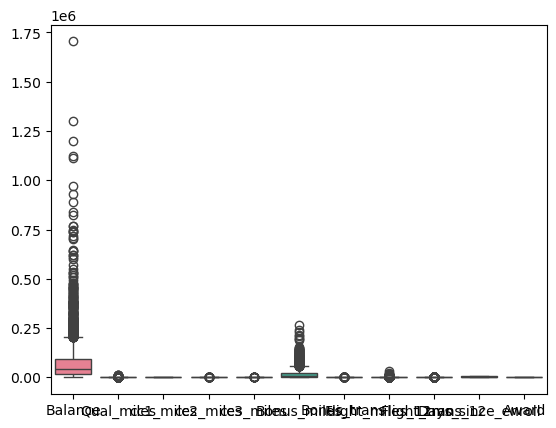

In [9]:
sns.boxplot(data)

## Removing Outliers

In [10]:
# Calculate Q1, Q3, and IQR
Q1 = data['Balance'].quantile(0.25)
Q3 = data['Balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
data['Balance'] = data['Balance'].clip(lower=lower_bound, upper=upper_bound)

In [11]:
Q1 = data['Bonus_miles'].quantile(0.25)
Q3 = data['Bonus_miles'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
data['Bonus_miles'] = data['Bonus_miles'].clip(lower=lower_bound, upper=upper_bound)

In [12]:
Q1 = data['Bonus_trans'].quantile(0.25)
Q3 = data['Bonus_trans'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
data['Bonus_trans'] = data['Bonus_trans'].clip(lower=lower_bound, upper=upper_bound)

In [13]:
Q1 = data['Flight_miles_12mo'].quantile(0.25)
Q3 = data['Flight_miles_12mo'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
data['Flight_miles_12mo'] = data['Flight_miles_12mo'].clip(lower=lower_bound, upper=upper_bound)

In [14]:
Q1 = data['Flight_trans_12'].quantile(0.25)
Q3 = data['Flight_trans_12'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
data['Flight_trans_12'] = data['Flight_trans_12'].clip(lower=lower_bound, upper=upper_bound)

In [15]:
data.reset_index(drop=True, inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0
2,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0
3,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0
4,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4,200.0,1.0,1403,1
3995,64385.0,0,1,1,1,981.0,5,0.0,0.0,1395,1
3996,73597.0,0,3,1,1,25447.0,8,0.0,0.0,1402,1
3997,54899.0,0,1,1,1,500.0,1,500.0,1.0,1401,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   int64  
 2   cc1_miles          3999 non-null   int64  
 3   cc2_miles          3999 non-null   int64  
 4   cc3_miles          3999 non-null   int64  
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   int64  
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   int64  
 10  Award              3999 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 343.8 KB


In [17]:
def get_standardized(i):
    z=(i-i.mean())/(i.std())
    return z

In [18]:
stand_data = get_standardized(data)
stand_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.607182,-0.186275,-0.769482,-0.09823,-0.062759,-0.842985,-1.148711,-0.604238,-0.626065,1.395280,-0.766823
1,-0.758852,-0.186275,-0.769482,-0.09823,-0.062759,-0.840717,-1.039003,-0.604238,-0.626065,1.379784,-0.766823
2,-0.382022,-0.186275,-0.769482,-0.09823,-0.062759,-0.624503,-0.819587,-0.604238,-0.626065,1.411744,-0.766823
3,-0.835002,-0.186275,-0.769482,-0.09823,-0.062759,-0.824949,-1.148711,-0.604238,-0.626065,1.372037,-0.766823
4,0.579192,-0.186275,1.409295,-0.09823,-0.062759,1.542998,1.593990,2.034235,2.019923,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.771941,-0.186275,-0.769482,-0.09823,-0.062759,-0.380959,-0.819587,0.074469,0.432330,-1.314955,1.303755
3995,0.010505,-0.186275,-0.769482,-0.09823,-0.062759,-0.798337,-0.709879,-0.604238,-0.626065,-1.318829,1.303755
3996,0.167509,-0.186275,0.683036,-0.09823,-0.062759,0.555265,-0.380755,-0.604238,-0.626065,-1.315439,1.303755
3997,-0.151169,-0.186275,-0.769482,-0.09823,-0.062759,-0.824949,-1.148711,1.092529,0.432330,-1.315924,-0.766823


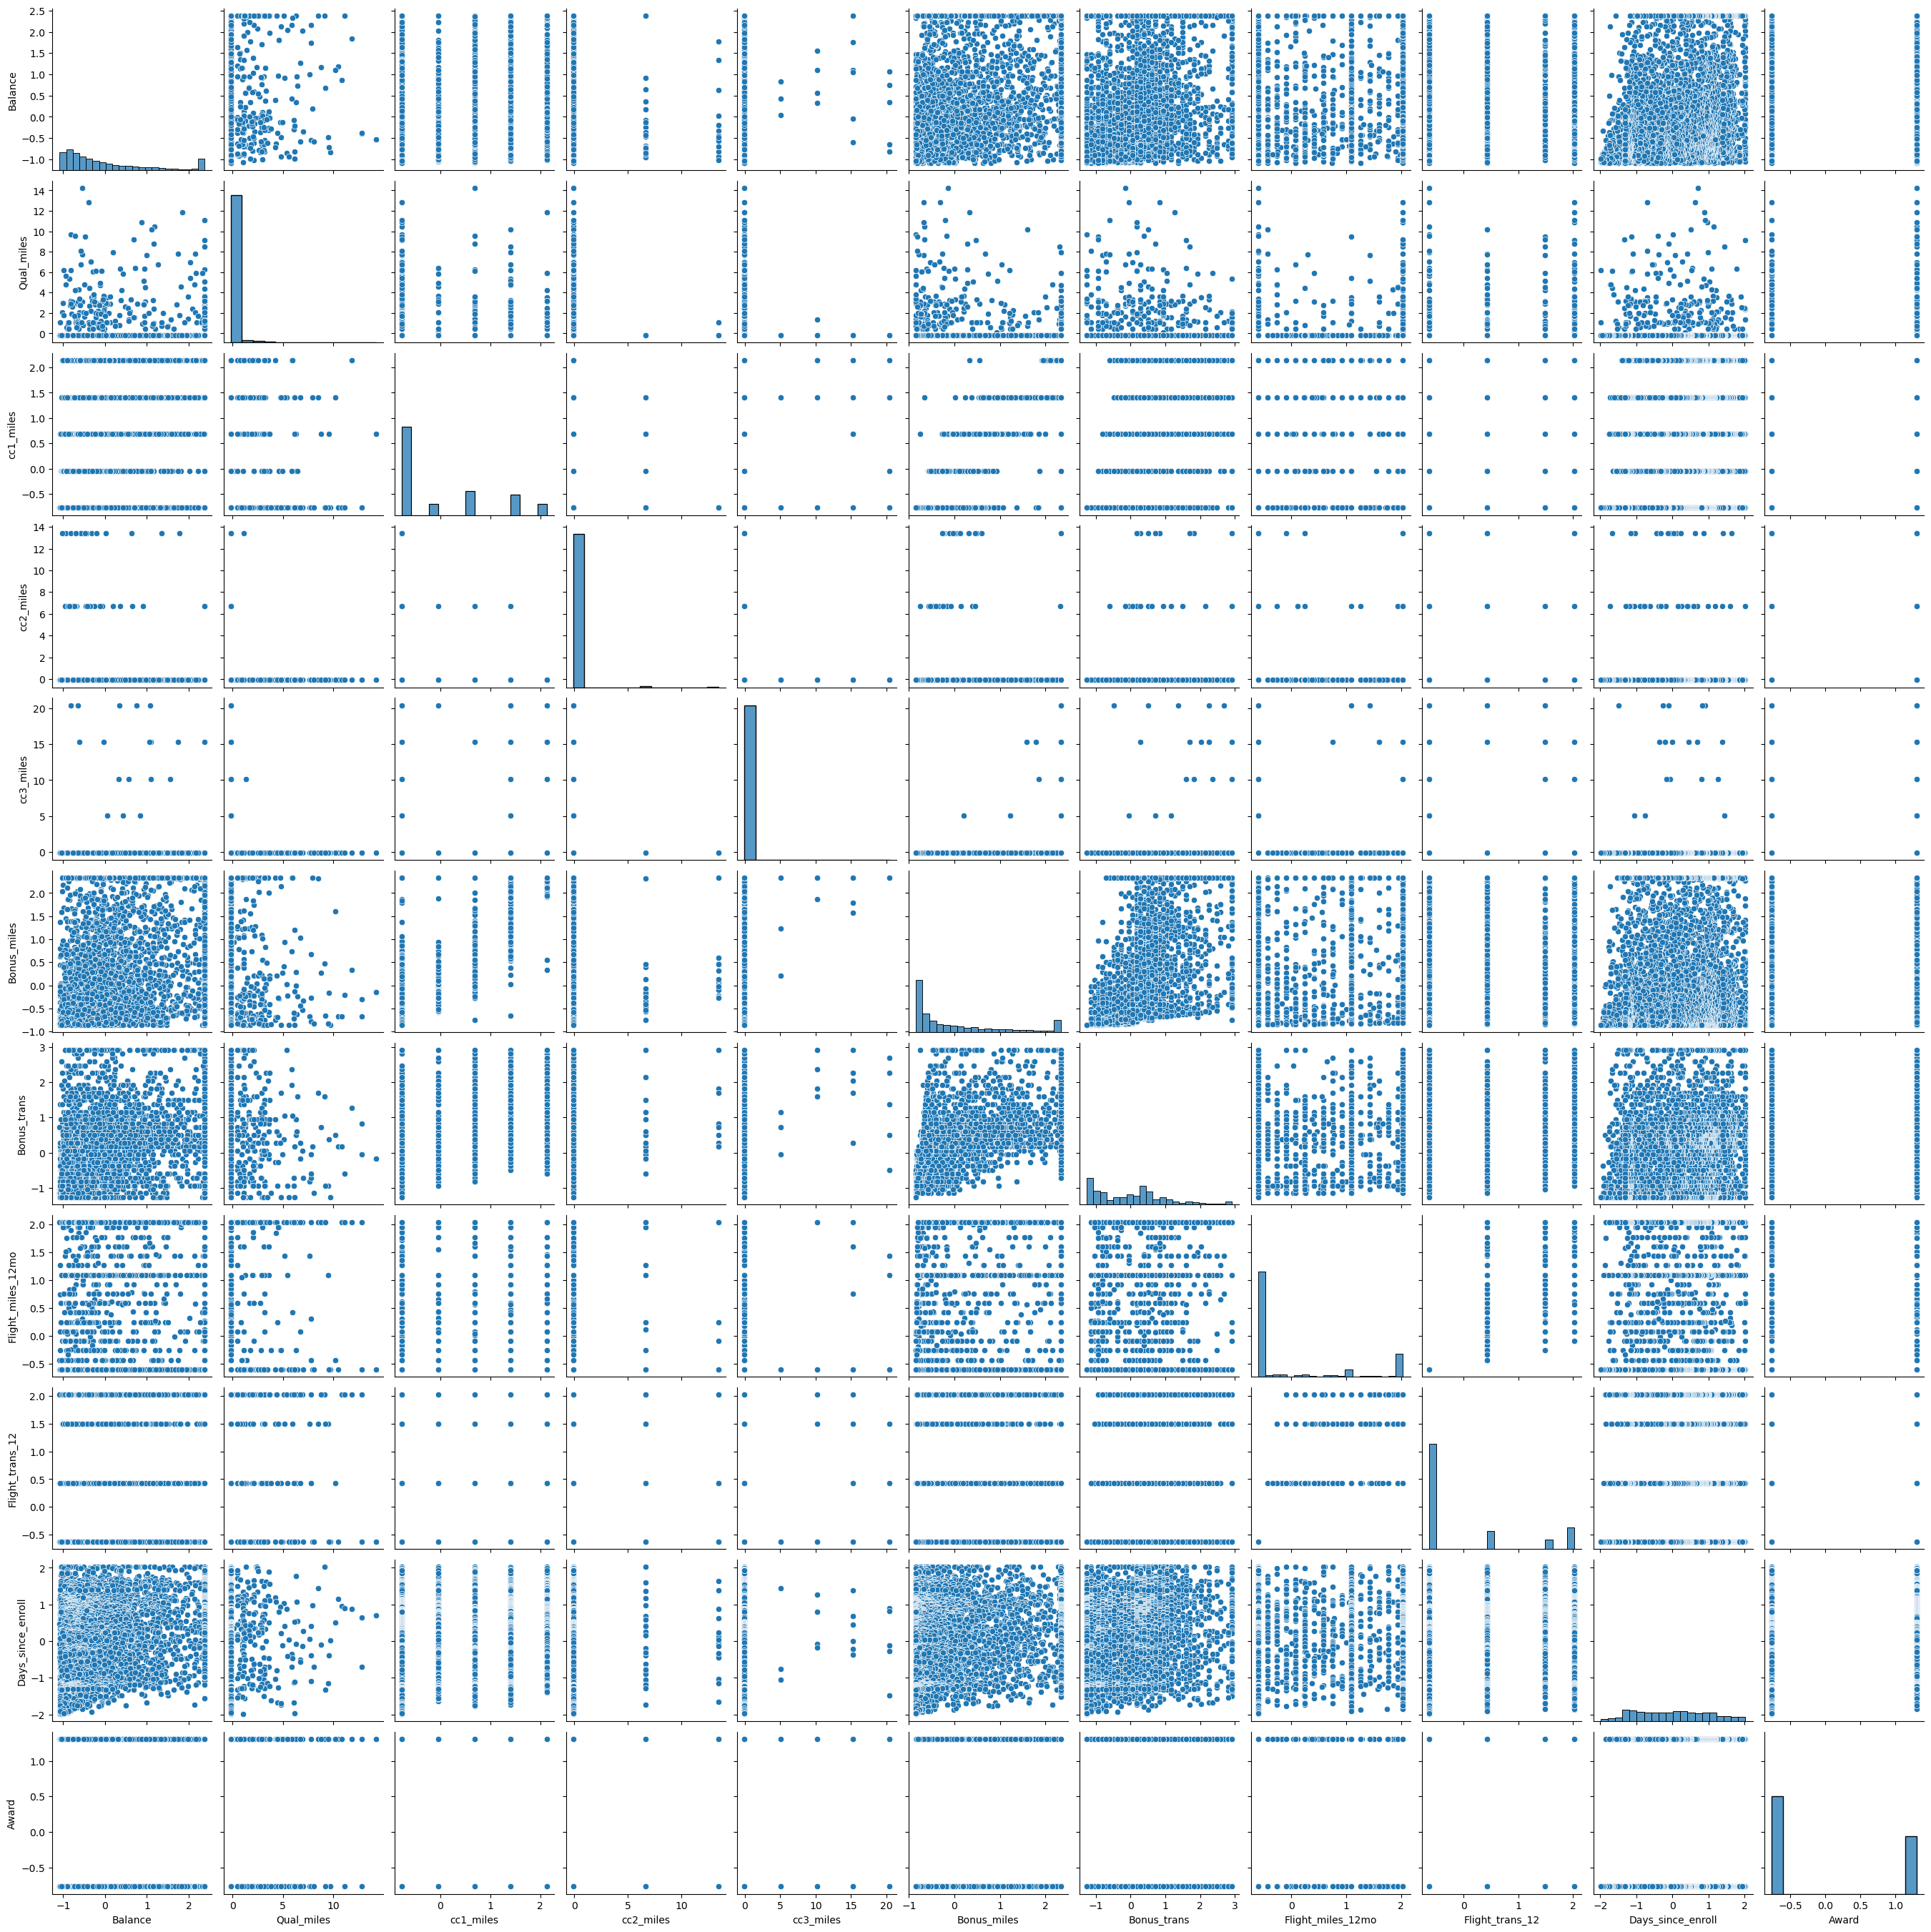

In [19]:
sns.pairplot(stand_data)

In [20]:
stand_data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.105882,0.446510,-0.015658,0.036054,0.494422,0.409017,0.297045,0.295565,0.286143,0.170678
Qual_miles,0.105882,1.000000,0.007931,-0.013923,-0.007779,0.034646,0.051616,0.146498,0.149166,0.017312,0.095256
cc1_miles,0.446510,0.007931,1.000000,-0.068223,0.060555,0.912531,0.627786,0.098786,0.087618,0.230849,0.335457
cc2_miles,-0.015658,-0.013923,-0.068223,1.000000,-0.006166,0.001866,0.064435,0.012451,0.018273,-0.005807,0.005332
cc3_miles,0.036054,-0.007779,0.060555,-0.006166,1.000000,0.136254,0.100905,0.018554,0.011546,0.010832,0.023484
Bonus_miles,0.494422,0.034646,0.912531,0.001866,0.136254,1.000000,0.663558,0.205801,0.193669,0.217320,0.394061
Bonus_trans,0.409017,0.051616,0.627786,0.064435,0.100905,0.663558,1.000000,0.310543,0.308518,0.170308,0.337444
Flight_miles_12mo,0.297045,0.146498,0.098786,0.012451,0.018554,0.205801,0.310543,1.000000,0.942734,0.095019,0.293119
Flight_trans_12,0.295565,0.149166,0.087618,0.018273,0.011546,0.193669,0.308518,0.942734,1.000000,0.091898,0.300085
Days_since_enroll,0.286143,0.017312,0.230849,-0.005807,0.010832,0.217320,0.170308,0.095019,0.091898,1.000000,0.188121


# 2. Implementing Clustering Algorithm:

## Kmeans

In [21]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(stand_data)

KMeans(n_clusters=2)

In [22]:
kmeans.inertia_

34190.83311953644

In [23]:
import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,9))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(stand_data)
    inertia.append(kc.inertia_)
    print(i,inertia)

2 [34189.2789667165]
3 [34189.2789667165, 29604.19632002153]
4 [34189.2789667165, 29604.19632002153, 27056.36809841413]
5 [34189.2789667165, 29604.19632002153, 27056.36809841413, 23410.30807287681]
6 [34189.2789667165, 29604.19632002153, 27056.36809841413, 23410.30807287681, 19951.037468403767]
7 [34189.2789667165, 29604.19632002153, 27056.36809841413, 23410.30807287681, 19951.037468403767, 21050.025672177464]
8 [34189.2789667165, 29604.19632002153, 27056.36809841413, 23410.30807287681, 19951.037468403767, 21050.025672177464, 18865.46728881936]


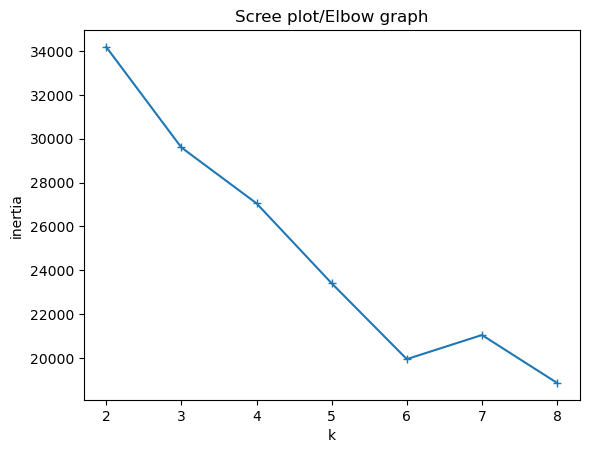

In [24]:
plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(stand_data)
labels_3=kmeans.labels_
labels_3

array([2, 2, 2, ..., 1, 2, 2])

In [26]:
from sklearn.metrics import silhouette_score
ss_3=silhouette_score(stand_data,labels_3)
ss_3

0.28208924501294796

In [27]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(stand_data)
labels_6=kmeans.labels_
labels_6

array([2, 2, 2, ..., 0, 2, 2])

In [28]:
ss_6=silhouette_score(stand_data,labels_6)
ss_6

0.24830879610709566

In [29]:
print(ss_3,ss_6)

0.28208924501294796 0.24830879610709566


In [30]:
#Assign clusters to the data set
data['clusterid'] = labels_3

In [31]:
pd.Series(labels_3).value_counts()

2    2089
1    1088
0     822
Name: count, dtype: int64

In [32]:
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0,2
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0,2
2,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0,2
3,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0,2
4,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4,200.0,1.0,1403,1,2
3995,64385.0,0,1,1,1,981.0,5,0.0,0.0,1395,1,2
3996,73597.0,0,3,1,1,25447.0,8,0.0,0.0,1402,1,1
3997,54899.0,0,1,1,1,500.0,1,500.0,1.0,1401,0,2


In [33]:
data.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97304.397506,434.704380,2.199513,1.018248,1.006083,20668.550487,16.600973,693.243917,2.234185,4495.077859,0.655718
1,1,94217.218980,72.588235,3.660846,1.001838,1.040441,33760.947151,17.531250,63.817555,0.223346,4782.367647,0.553309
2,2,34714.325275,67.022978,1.170416,1.019627,1.000000,3784.611297,6.295357,34.832216,0.136908,3624.676400,0.162757


## DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps=2, min_samples=14)
labels=dbscan.fit_predict(stand_data)

In [36]:
pd.Series(labels).value_counts()

 0    2449
 1    1399
-1     151
Name: count, dtype: int64

In [37]:
silhouette_score(stand_data,labels)

0.225481365026947

In [38]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
data['clusterid1']=dbscan.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid,clusterid1
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0,2,0
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0,2,0
2,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0,2,0
3,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0,2,0
4,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1,0,1


In [40]:
data.groupby('clusterid1').agg(['mean']).reset_index()

,clusterid1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,89441.155629,2540.880795,2.158940,1.384106,1.324503,24387.034768,17.304636,325.860927,1.079470,4071.635762,0.543046,0.874172
1,0,55447.364332,28.997142,1.700694,1.000000,1.000000,9664.979992,8.964475,109.534504,0.365251,3828.106574,0.000000,1.590037
2,1,75564.377949,86.938528,2.676912,1.000000,1.000000,24500.024124,15.228020,282.051108,0.934954,4632.072194,1.000000,0.886347


## Hierachical clustering

In [41]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [42]:
dm=sch.linkage(stand_data, metric='euclidean',method='single')

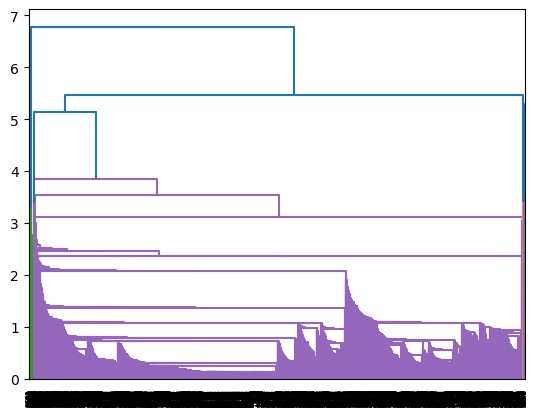

In [43]:
dendrogram = sch.dendrogram(dm)
plt.show()

In [46]:
Hierachical = AgglomerativeClustering(n_clusters=4, metric= 'euclidean', linkage = 'single')
Hierachical.fit(stand_data)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [47]:
Hierachical.labels_
pd.Series(Hierachical.labels_).value_counts()

1    3941
2      28
0      15
3      15
Name: count, dtype: int64

In [48]:
data['clusterid2'] = Hierachical.labels_

In [49]:
data.groupby(['clusterid2']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid,clusterid1
clusterid2,,,,,,,,,,,,,
0,102441.716667,78.800000,3.466667,1.0,4.066667,55485.600000,27.533333,298.833333,0.866667,4613.866667,0.533333,0.866667,-1.000000
1,63715.134611,145.681807,2.064197,1.0,1.000761,15269.121479,11.347628,177.259325,0.588683,4118.306775,0.369449,1.317178,0.331388
2,56761.866071,0.000000,1.214286,2.0,1.000000,11625.214286,16.500000,195.464286,0.732143,3911.821429,0.392857,1.428571,-1.000000
3,52231.400000,66.666667,1.000000,3.0,1.000000,19607.616667,18.333333,234.000000,0.800000,4075.533333,0.400000,1.466667,-1.000000


# 3. Cluster Analysis and Interpretation

Here, we employ three distinct clustering algorithms: hierchical clustering, dbscan, and kmeans.Among these three techniques, kmeans produces clusters since its silhouette score is superior to dbscan's, and hierarchical clustering is known to perform poorly on larger datasets.

# 4. Visualization

In [53]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster
airline= TSNE(n_components=2).fit_transform(data)
cluster.tsneplot(score= airline)
pd.DataFrame(airline)

,0,1
0,-34.156040,-31.415865
1,-52.784557,-15.419549
2,1.923737,-34.806400
3,-56.381107,-7.563233
4,18.683544,34.052746
...,...,...
3994,-34.083912,-5.501573
3995,27.724766,-15.636317
3996,19.565771,12.267454
3997,18.616810,-27.780888


## Visualization for Kmeans clustering

In [54]:
km_final= pd.concat([pd.DataFrame(airline,columns=['Feature1','Feature2']), data[['clusterid']]], axis = 1)

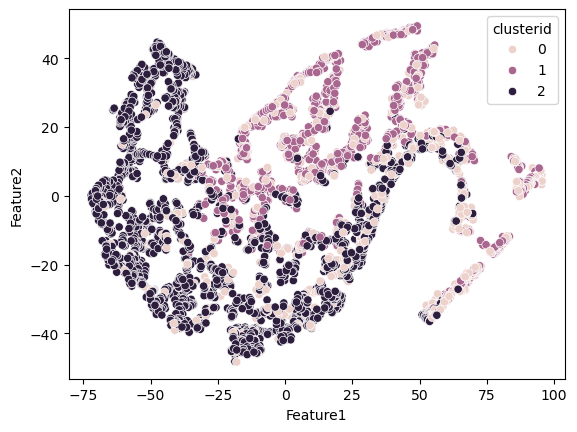

In [55]:
sns.scatterplot(data= km_final,x='Feature1',y='Feature2',hue='clusterid')
plt.show()

## Visualization for DBSCAN clustering

In [56]:
db_final= pd.concat([pd.DataFrame(airline,columns=['Feature1','Feature2']), data[['clusterid1']]], axis = 1)

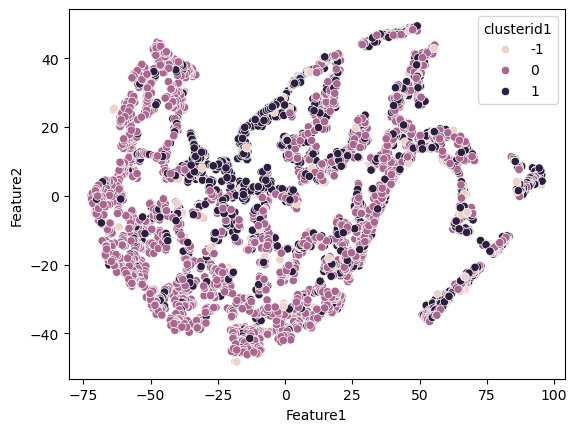

In [57]:
sns.scatterplot(data= db_final,x='Feature1',y='Feature2',hue='clusterid1')
plt.show()

## Visualization for Hiarchical clustering

In [58]:
hc_final= pd.concat([pd.DataFrame(airline,columns=['Feature1','Feature2']), data[['clusterid2']]], axis = 1)

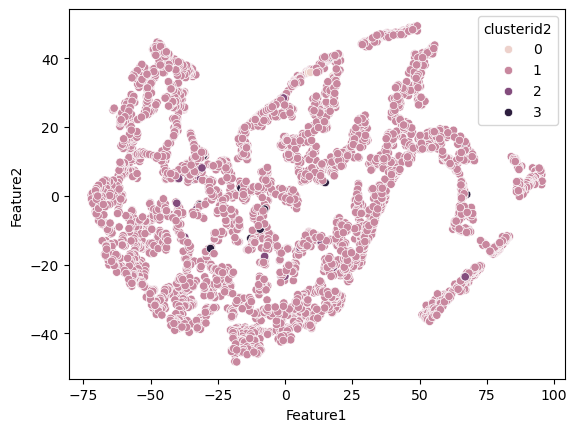

In [59]:
sns.scatterplot(data= hc_final,x='Feature1',y='Feature2',hue='clusterid2')
plt.show()

# 5. Evaluation and Performance Metrics

We can conclude that KMeans provides a more accurate cluster than DBSCAN in this instance because its greatest silhouette score is 0.280 compared to 0.225 for DBSCAN.